In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import ast
import re
%matplotlib inline

pd.set_option('display.max_rows', 1000) # Increase maximum rows display in the cell output to 1000 rows

In [2]:
df = pd.read_csv('./dataset/seattle_airbnb/listings.csv')
print('Shape of dataframe: ', df.shape)
df.head()

Shape of dataframe:  (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Check type of features in the dataframe
df_types = df.dtypes
df_types

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [4]:
# Get columns have float64 value type
df_types[df_types == 'float64']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [5]:
# Get columns have object value type
df_types[df_types == 'object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

In [6]:
# Print total null value of each feature in the dataframe, order from highest to lowest
df.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
last_review                          627
first_review                         627
reviews_per_month                    627
space                                569
host_response_rate                   523
host_response_time                   523
neighbourhood   

# Question 1: What are the most common verification methods from host in the listings ?

In [7]:
list_of_host_verifications = []
for i in range(len(df)):
    list_of_host_verifications.append(ast.literal_eval(df['host_verifications'][i])) # Use ast (Abstract Syntax Tree) library to convert string of list to list

In [8]:
# Convert list of lists into one list
flat_host_verifications_list = []
for sublist in list_of_host_verifications:
    if sublist is None: # Remove any sub list is None value
        continue
    else:
        for item in sublist:
            flat_host_verifications_list.append(item)

In [9]:
# Remove duplicated elements in verifications list to create list of unique verifications
flat_host_verifications_list = list(set(flat_host_verifications_list))

In [10]:
'''
This function I took from HowToBreakIntoTheField library provided for Notebook + Quiz: How To Break Into the Field in Introduction to Datascience 
in Udacity Data Scientist Course.
'''

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [11]:
'''
This function I took from Notebook + Quiz: How To Break Into the Field in Introduction to Datascience in Udacity Data Scientist Course and I have
modified it a little bit to properly use in this project
'''

def clean_and_plot(df, title='Top 10 Most Common Verification Methods from Host in The Dataset', plot=True):
    '''
    INPUT 
        df - a dataframe holding the host_verifications column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        verifications_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the host_verifications column.
    '''
    verifications = df['host_verifications'].value_counts().reset_index()
    verifications.rename(columns={'index': 'host_verifications', 'host_verifications': 'count'}, inplace=True)
    verifications_df = total_count(verifications, 'host_verifications', 'count', flat_host_verifications_list)

    verifications_df.set_index('host_verifications', inplace=True)
    if plot:
        (verifications_df/verifications_df.sum()).plot(kind='bar', legend=None, figsize=(10, 10));
        plt.title(title);
        plt.ylabel('The percent of verification methods in the listings')
        plt.show()
    props_verifications_df = verifications_df/verifications_df.sum()
    return props_verifications_df.reset_index()

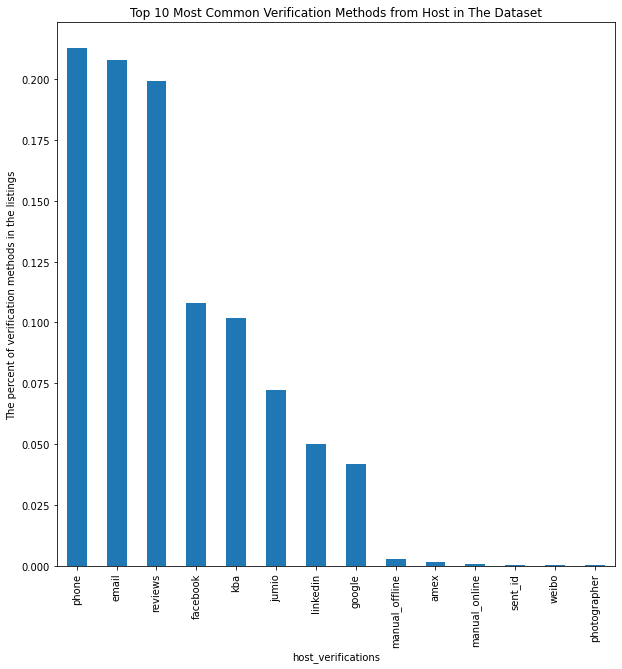

,host_verifications,count
0,phone,0.212703
1,email,0.207934
2,reviews,0.199125
3,facebook,0.108175
4,kba,0.101891
5,jumio,0.072322
6,linkedin,0.049992
7,google,0.041800
8,manual_offline,0.002918
9,amex,0.001403


In [12]:
clean_and_plot(df)

In the chart and table above we can see that the top 3 common verification methods in Seattle listings are:
- Phone:    21.27%
- Email:    20.79%
- Reviews:  19.91%

# Question 2: - How different types of features attract the guests for renting a homestay ?

In [13]:
# Function to remove the following characters from amenities values: {, }, "
def process_amenities(txt):
    txt, n = re.subn('[{|}|"]', '', txt)
    return txt

In [14]:
list_of_amenities = list(df['amenities'].apply(lambda x: process_amenities(x).split(',')))
flat_amenities_list = []
for sublist in list_of_amenities:
    if sublist is None:
        continue
    else:
        for item in sublist:
            flat_amenities_list.append(item)
			
list_of_amenities_unique = [amenity for amenity in set(flat_amenities_list) if amenity]

In [15]:
# Get features have the word "type" in their name 
feature_type_list = []
for feature in df.columns:
    if 'type' in feature:
        feature_type_list.append(feature)
        
feature_type_list

['property_type', 'room_type', 'bed_type']

In [16]:
'''
In this question, we will check how attractive of features to customers based on the availability column.
Which means the more availability of a feature, the less its attract customers.
'''
df['popularity_30'] = 1 - (df['availability_30']/30) # Create popularity_30 column based on availability_30 column

In [17]:
property_type_availability = df.groupby(['property_type']).mean()['popularity_30'].sort_values(ascending=False)
property_type_availability

property_type
Tent               0.800000
Dorm               0.666667
Treehouse          0.666667
Chalet             0.500000
Cabin              0.469841
Apartment          0.456011
Condominium        0.454579
Loft               0.435000
House              0.432583
Townhouse          0.413559
Camper/RV          0.410256
Other              0.301515
Bed & Breakfast    0.257658
Boat               0.250000
Bungalow           0.215385
Yurt               0.066667
Name: popularity_30, dtype: float64

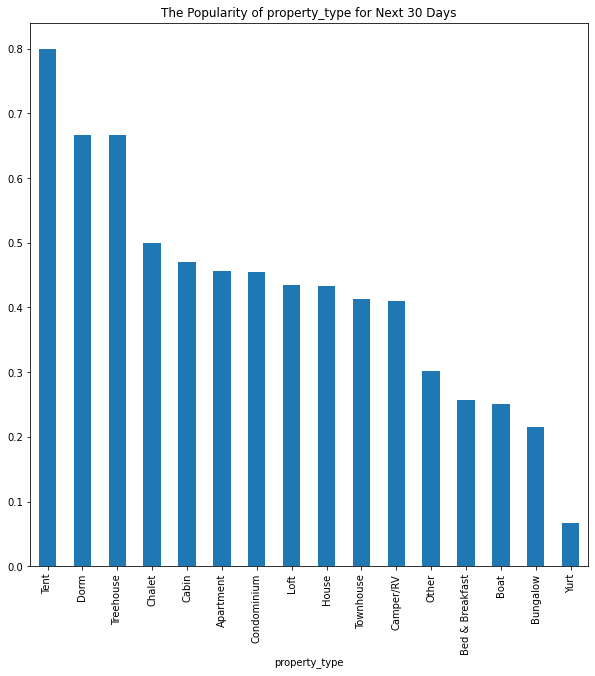

In [18]:
property_type_availability.plot(kind='bar', legend=None, figsize=(10, 10))
plt.title('The Popularity of property_type for Next 30 Days');
plt.show()

Looking at the above chart, we can see that the homestay attracts more guests if it has tents, a dormitory or a treehouse.

In [19]:
room_type_availability = df.groupby(['room_type']).mean()['popularity_30'].sort_values(ascending=False)
room_type_availability

room_type
Entire home/apt    0.483353
Private room       0.362759
Shared room        0.279202
Name: popularity_30, dtype: float64

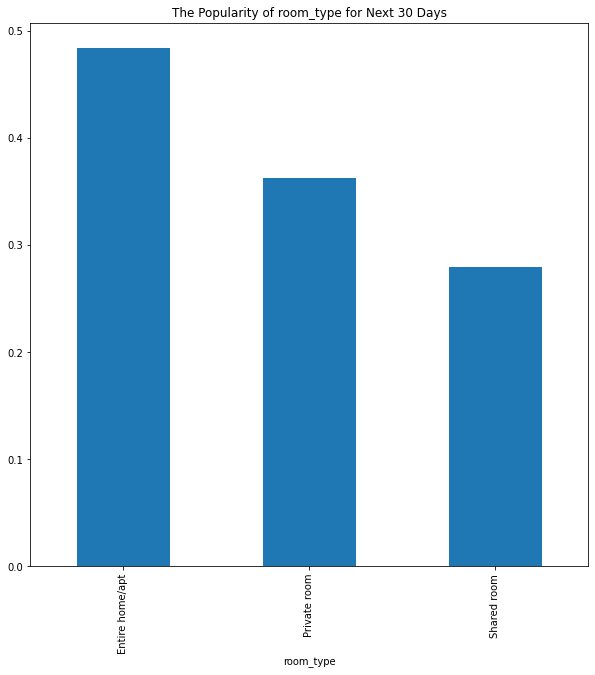

In [20]:
room_type_availability.plot(kind='bar', legend=None, figsize=(10, 10))
plt.title('The Popularity of room_type for Next 30 Days');
plt.show()

Looking at the chart above, we can see that an entire home or an apartment homestay is more popular than a private room or a shared room by approximately 10%.

In [21]:
bed_type_availability = df.groupby(['bed_type']).mean()['popularity_30'].sort_values(ascending=False)
bed_type_availability

bed_type
Couch            0.579487
Futon            0.451351
Real Bed         0.441564
Airbed           0.419753
Pull-out Sofa    0.310638
Name: popularity_30, dtype: float64

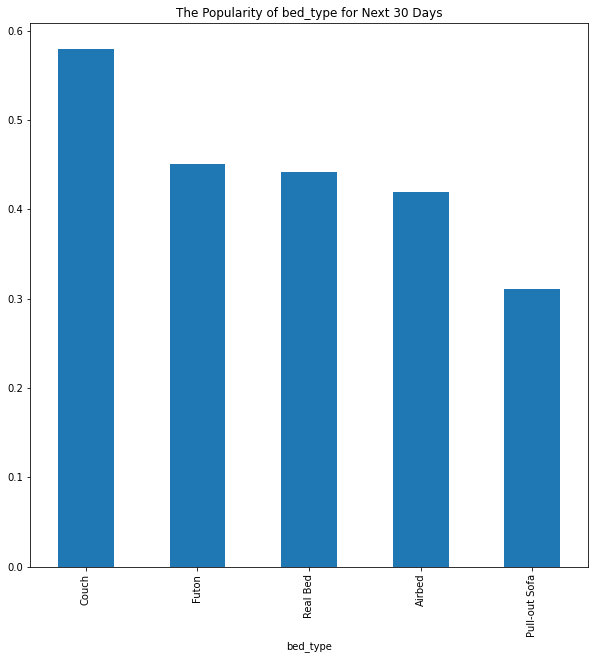

In [22]:
bed_type_availability.plot(kind='bar', legend=None, figsize=(10, 10))
plt.title('The Popularity of bed_type for Next 30 Days');
plt.show()

Looking at the above chart, we can see that if the homestay has a couch, a futon or a real bed, it will attract more guests than the others.

In summary, an attractive homestay should be an entire home/apartment and it should also has a couch or at least a real bed, tents, a treehouse or a dormitory.

# Question 3: What are the most influential features affect the price of homestays in Seattle ?

In [23]:
# This function is used to elimate these symbols from the price values: "$", ","
def process_price(txt):
    txt, n = re.subn('[$|,]', '', txt)
    return txt

In [24]:
# Create new dataframe by choosing categorical columns of the dataframe that we want to use as features
df_new = df[['property_type', 'room_type', 'bed_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]
df_new.shape

(3818, 8)

In [25]:
df_new['price'] = df_new['price'].apply(lambda x: process_price(x))
df_new['price'] = df_new['price'].astype(float)

c:\Users\neonx\python_venv\udacity\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\neonx\python_venv\udacity\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
cat_columns = list(df_new.select_dtypes(include=['object']).columns)
cat_columns

['property_type', 'room_type', 'bed_type']

In [27]:
'''
This function I took from Notebook + Quiz: Categorical Variables in Introduction to Datascience in Udacity Data Scientist Course and I have
modified it a little bit to properly use in this project
'''

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [28]:
'''
This function I took from Notebook + Quiz: Categorical Variables in Introduction to Datascience in Udacity Data Scientist Course and I have
modified it a little bit to properly use in this project
'''

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [29]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'price', cat_columns, dummy_na=False)

c:\Users\neonx\python_venv\udacity\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [30]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5269091529139549.  The rsquared on the test data was 0.5591501319950756.


In [31]:
'''
This function I took from Notebook + Quiz: Putting It All Together in Introduction to Datascience in Udacity Data Scientist Course and I have
modified it a little bit to properly use in this project
'''

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [32]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.reset_index(drop=True, inplace=True)
coef_df.head(20)

,est_int,coefs,abs_coefs
0,property_type_Boat,135.991849,135.991849
1,room_type_Shared room,-62.365397,62.365397
2,property_type_Camper/RV,58.727952,58.727952
3,property_type_Dorm,-42.367606,42.367606
4,property_type_Tent,-38.403647,38.403647
5,room_type_Private room,-36.983398,36.983398
6,bathrooms,33.289887,33.289887
7,bedrooms,29.028951,29.028951
8,property_type_Treehouse,24.357420,24.357420
9,property_type_Loft,21.634089,21.634089


Looking at the table above, we can see that:

- Boat property appears to be the top indicator that affects the price of a homestay.

- The number of bathrooms and bedrooms also has a reasonable effect on the price of a homestay.

- People unlikely want to share a room with others when renting a homestay and this would affect the price of a homestay badly.